# Exercise 1

In [1]:
from thinkdsp import Signal, Sinusoid, SquareSignal, TriangleSignal, SawtoothSignal, ParabolicSignal
from thinkdsp import normalize, unbias, PI2, decorate
from thinkdsp import Chirp
from thinkdsp import read_wave
from thinkdsp import Spectrum, Wave, UncorrelatedGaussianNoise, Spectrogram
from thinkdsp import Noise

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import thinkstats2

from scipy.stats import linregress

import scipy
import scipy.fftpack

import scipy.signal

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

loglog = dict(xscale='log', yscale='log')

PI2 = np.pi * 2

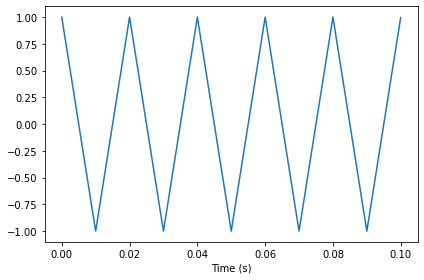

In [2]:
in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

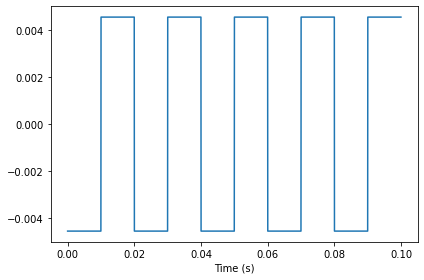

In [3]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

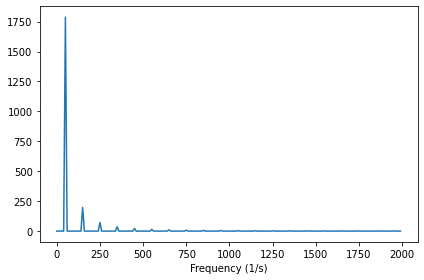

In [14]:
in_spectrum = in_wave.make_spectrum()
in_spectrum.plot(high=2000)
decorate(xlabel='Frequency (1/s)')

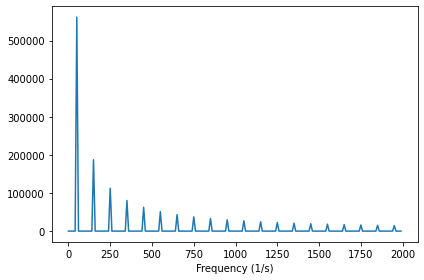

In [17]:
out_spectrum = in_spectrum.differentiate()
out_spectrum.plot(high=2000)
decorate(xlabel='Frequency (1/s)')

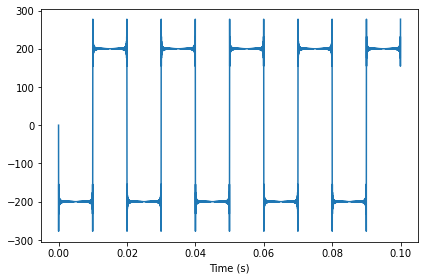

In [19]:
out_wave2 = out_spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

# Exercise 2

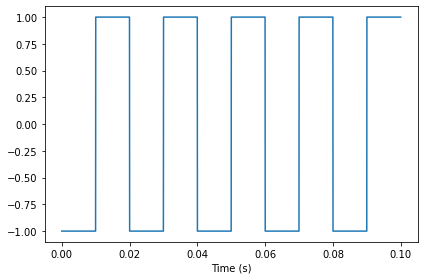

In [20]:
in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

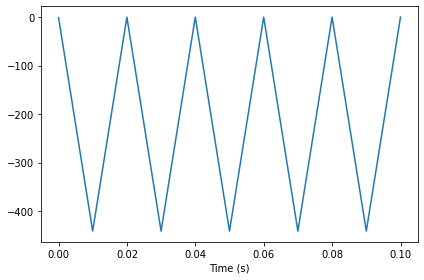

In [21]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

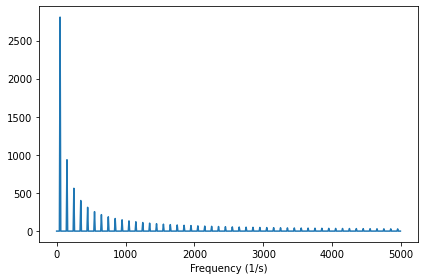

In [23]:
in_spectrum = in_wave.make_spectrum()
in_spectrum.hs[0] = 0
in_spectrum.plot(high=5000)
decorate(xlabel='Frequency (1/s)')

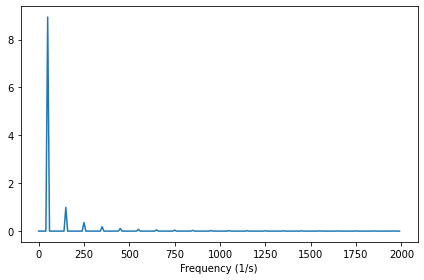

In [25]:
out_spectrum = in_spectrum.integrate()
out_spectrum.hs[0] = 0
out_spectrum.plot(high=2000)
decorate(xlabel='Frequency (1/s)')

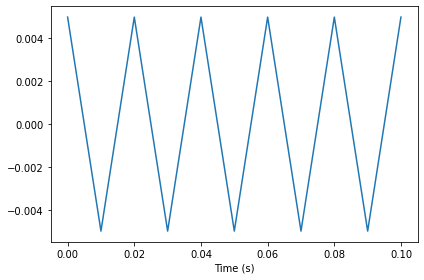

In [29]:
out_wave2 = out_spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

# Exercise 3

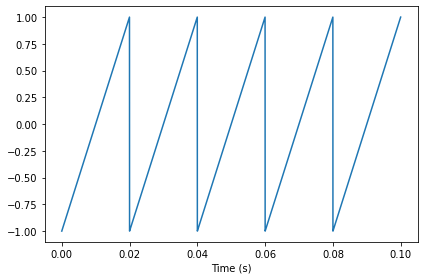

In [30]:
in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

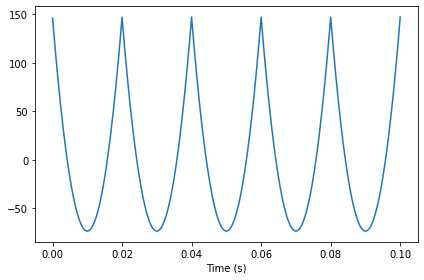

In [31]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

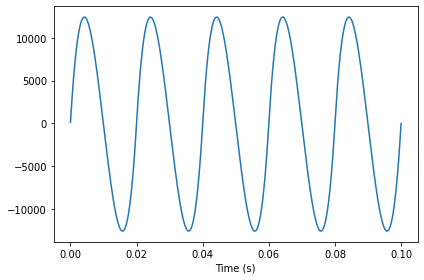

In [32]:
out_wave = out_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

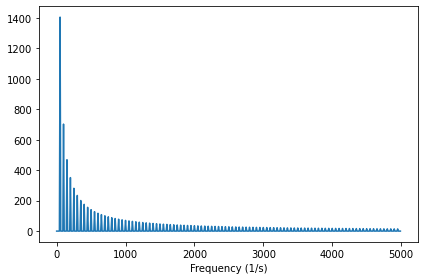

In [35]:
in_spectrum = in_wave.make_spectrum()
in_spectrum.hs[0] = 0
in_spectrum.plot(high=5000)
decorate(xlabel='Frequency (1/s)')

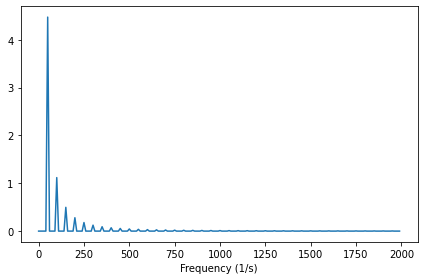

In [37]:
out_spectrum = in_spectrum.integrate()
out_spectrum.hs[0] = 0
out_spectrum.plot(high=2000)
decorate(xlabel='Frequency (1/s)')

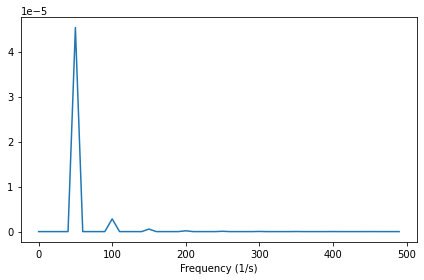

In [39]:
out_spectrum = out_spectrum.integrate()
out_spectrum.hs[0] = 0
out_spectrum.plot(high=500)
decorate(xlabel='Frequency (1/s)')

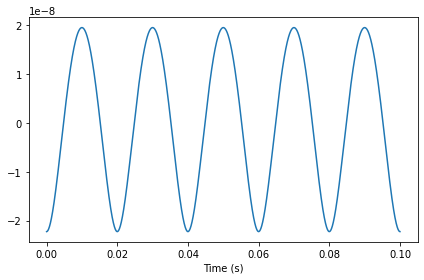

In [40]:
out_wave2 = out_spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

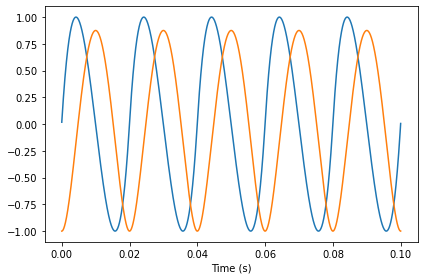

In [44]:
out_wave.normalize()
out_wave.unbias()
out_wave.plot()

out_wave2.normalize()
out_wave2.unbias()
out_wave2.plot()

decorate(xlabel='Time (s)')

# Exercise 4

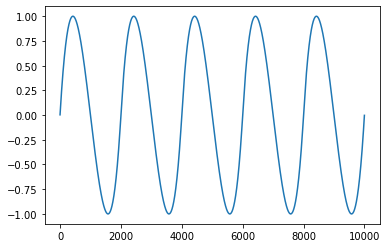

In [46]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

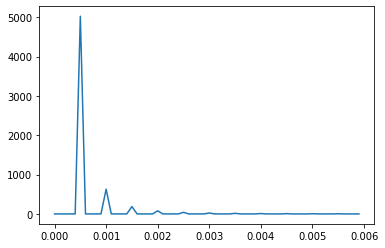

In [49]:
in_wave.make_spectrum().plot(high=0.006)

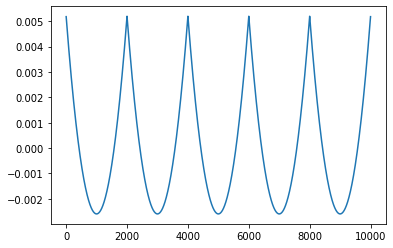

In [50]:
out_wave = in_wave.diff()
out_wave.plot()

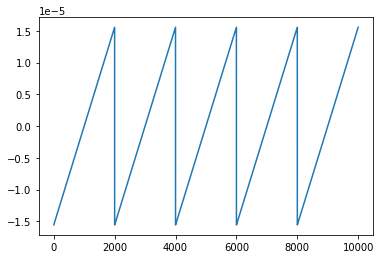

In [51]:
out_wave = out_wave.diff()
out_wave.plot()

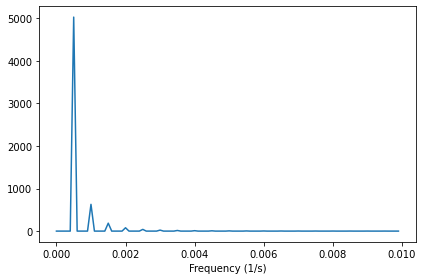

In [54]:
in_spectrum = in_wave.make_spectrum()
in_spectrum.plot(high=0.01)
decorate(xlabel='Frequency (1/s)')

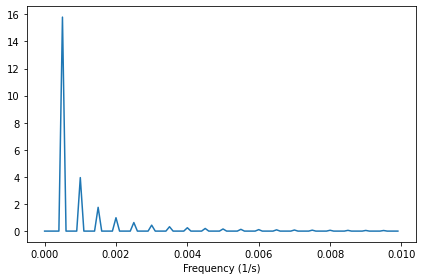

In [55]:
out_spectrum = in_spectrum.differentiate()
out_spectrum.plot(high=0.01)
decorate(xlabel='Frequency (1/s)')

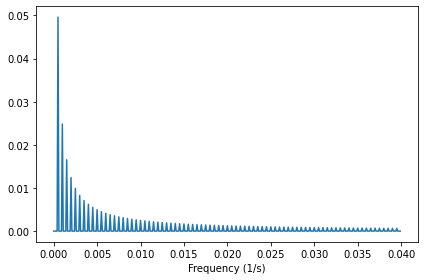

In [58]:
out_spectrum = out_spectrum.differentiate()
out_spectrum.plot(high=0.04)
decorate(xlabel='Frequency (1/s)')

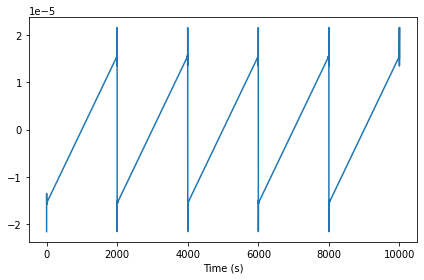

In [59]:
out_wave2 = out_spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

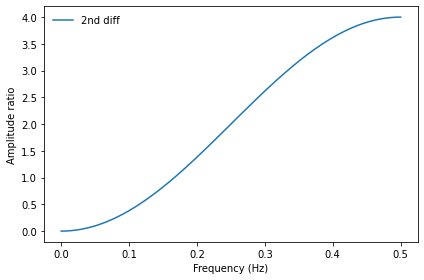

In [62]:
from thinkdsp import zero_pad

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)

diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')

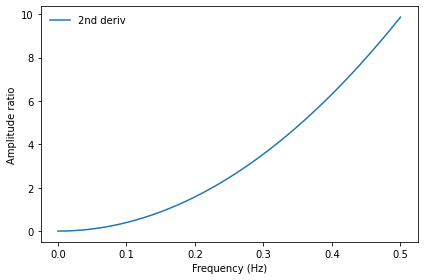

In [64]:
deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')

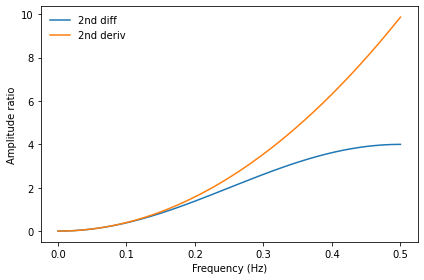

In [65]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')